Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [32]:
NICKNAME = "DziyanaC"

---

# Часть I. Односторонние разностные схемы

Напишите функцию `deriv`, которая вычисляет производную функции в заданной точке $x$, используя одностороннюю разностную схему с заданным шагом $h$ и степенью аппроксимации $O(h^2)$.

In [33]:
def deriv(f, x, h):
    """ Вычисляет производную `f` в точке `x` с шагом `h`.
    Вычисляет производную, используя односторонню разностную схему со степенью аппроксимации $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        Функция, которую нужно продифференцировать
    x : float
        Точка, в которой нужно дифференцировать функцию
    h : float
        Шаг
        
    Rerurns
    -------
    fder : производная f(x) в точке x с шагом h.
    """
    u_i = f(x)
    u_ii = f(x + h)
    u_iii = f(x + 2 * h)
    fder = (-3 * u_i + 4 * u_ii - u_iii) / (2 * h)
    return fder

#### Тест I.1

Проверьте ваш алгоритм на простом примере: продифференцируйте $f(x) = x^3$ в точке $x=0$. Прокомментируйте, совпадает ли результат с ожидаемым $f'(x) = 0$ при стремлении $h\to 0$.

In [34]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))


0.010000 -- -0.0002
0.001000 --  -2e-06
0.000100 --  -2e-08
0.000010 --  -2e-10


3аметим, что когда h стремится к нулю, к нулю стремится и погрешность вычисления проиводной. Порядок аппроксимации $O(h^2)$

### Тест I.2

Теперь попробуйте немного более сложную функцию $f(x) = x^2 \log{x}$. Оцените значение производной в точке $x=1$, используя *двухточечную* и *трехточечную* схемы. Для обеих схем оцените значение $h$, при котором ошибка перестанет падать.

In [35]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

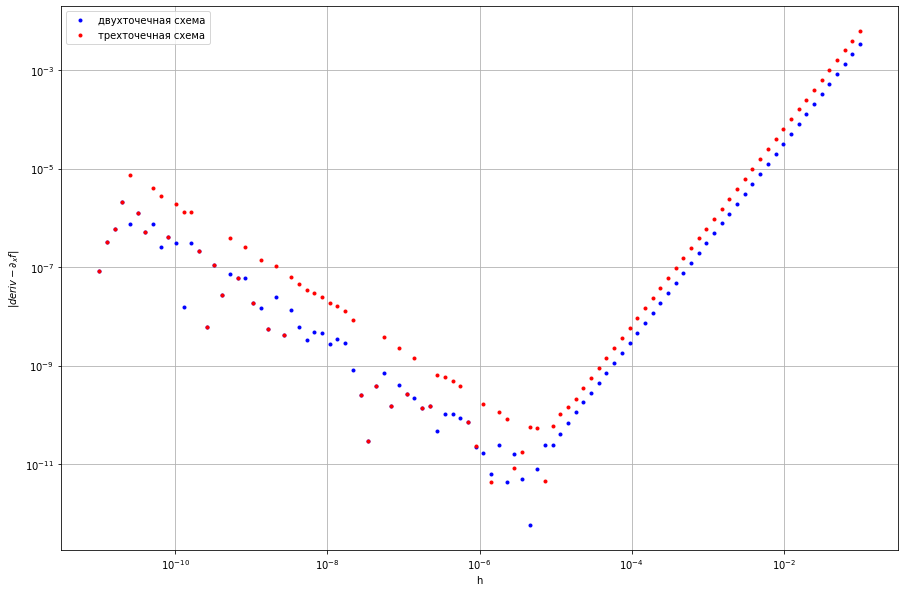

In [36]:
import matplotlib.pyplot as plt
import numpy as np
def deriv_2p(f, x, h):
    fder_2p = (f(x + h) - f(x - h)) / (2 * h)
    return fder_2p

def deriv_3p(f, x, h):
    fder_3p = (-3 * f(x) + 4 * f(x + h) - f(x + 2 * h)) / (2 * h)
    return fder_3p
x = 1
h_list = np.logspace(-11, -1, 100)
error_2p = []
error_3p = []
for h in h_list:
    error_2p.append(abs(deriv_2p(f, x, h) - fder(x)))
    error_3p.append(abs(deriv_3p(f, x, h) - fder(x)))
    
fig, axes = plt.subplots(1, figsize=(15, 10))
ax1 = axes
ax1.set(xlabel = "h", ylabel = "$|deriv-\partial_x f|$")
ax1.loglog(h_list, error_2p, '.', label = "двухточечная схема", color='blue')
ax1.loglog(h_list, error_3p, '.', label = "трехточечная схема", color='red')
ax1.legend()
ax1.grid(True)
ax1.legend(loc='best')

Как для двухточечной, так и для трехточечной схем ошибка перестает падать при значении $h$ порядка $10^{-6}$ .

### Тест I.3 

Теперь продифференцируйте $x^2 \log(x)$ в $x=0$. Используйте трехточечную схему. Заметьте, что в нуле функцию нужно доопределить явным образом. Постройте зависимость ошибки от величины шага $h$. Объясните полученные результаты.



In [37]:
def f(x):
    if x == 0:
        # предел $x^2 log(x)$ при $x-> 0$ равен нулю, хотя log(x) не определен в x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05


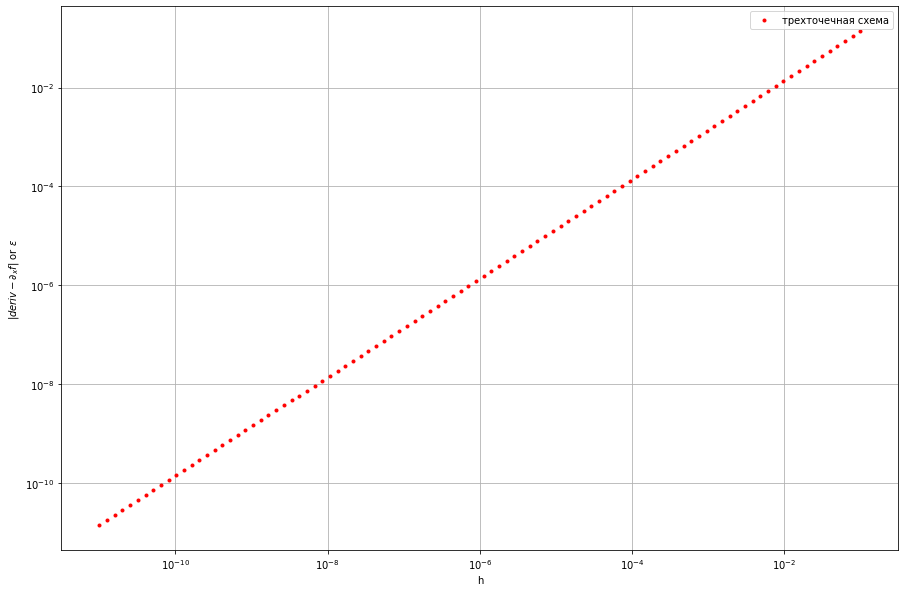

In [38]:
x = 0
h_list = np.logspace(-11, -1, 100)
error_3p = []
for h in h_list:
    error_3p.append(abs(deriv_3p(f, x, h) - fder(x)))
    
fig, axes = plt.subplots(1, figsize=(15, 10))
ax1 = axes
ax1.set(xlabel = "h", ylabel = "$|deriv-\partial_x f|$ or $\epsilon$")
ax1.loglog(h_list, error_3p, '.', label = "трехточечная схема", color='red')
ax1.legend()
ax1.grid(True)
ax1.legend(loc='best')

Для х = 0 ошибка растет прямо пропорционально шагу h. Приближение совпадает с реальным значением производной в точке 0, поэтому основной вклад вносить ошибка нашей схемы.

Для x = 1 при h ~ $10^{-6}$ ошибка перестает падать. Это объясняется тем, что при маленьких h ошибка накапливается в следствие ошибки машинного округления, а при больших h она накапливается в основном за счет ошибки нашего приближения производной.

# Часть II. Midpoint rule

Напишите функцию, вычисляющую определенный интеграл, используя midpoint rule, с точностью до заданной погрешности $\epsilon$. Оценивайте ошибку, сравнивая значения интеграла для $N$ и $2N$ элементарных интервалов.

In [39]:
def midpoint_rule(func, a, b, eps):
    """ Вычисляет интеграл f от a до b используя правило центральной точки.
    
    Parameters
    ----------
    func : callable
        Функция, которую нужно проинтегрировать
    a : float
        Нижний предел интегрирования
    b : float
        Верхний предел интегрирования
    eps : float
        Ожидаемая ошибка оценки
        
    Returns
    -------
    integral : float
        Оценка интеграла $\int_a^b f(x) dx$.
    n : int
        The number of intervals on segment.
    """
    N = 1
    midp = (a + b) / 2
    int = b - a
    int_n = func(midp) * int
    int_2n = (func((a + midp) / 2) + func((midp + b) / 2)) * int / 2
    while abs(int_2n - int_n) >= eps:
        N += 1

        h1 = int / N
        i = np.arange(1, N + 1)
        int_n = (func(a + (i - 0.5) * h1) * h1).sum()

        h2 = int / (2 * N)
        i = np.arange(1, 2 * N + 1)
        int_2n = (func(a + (i - 0.5) * h2) * h2).sum()

    integral = int_n 
    return integral, N

### Тест II.1

Протестирутйте ваш алгоритм на простом интеграле, который вы можете посчитать аналитически.

Сравните скорость сходимости с ожидаемой $O(N^{-2})$ в зависимости от количества интервалов, необходимых для заданной точности $\epsilon$.

Сравните полученный результат с ответом, вычисленным "руками". Попадает ли результат в интервал заданной ошибки?

(20% итоговой оценки)


Значение интеграла с точностью $10^{-2}$ равно 63.98667221990835 при количестве интервалов N = 49


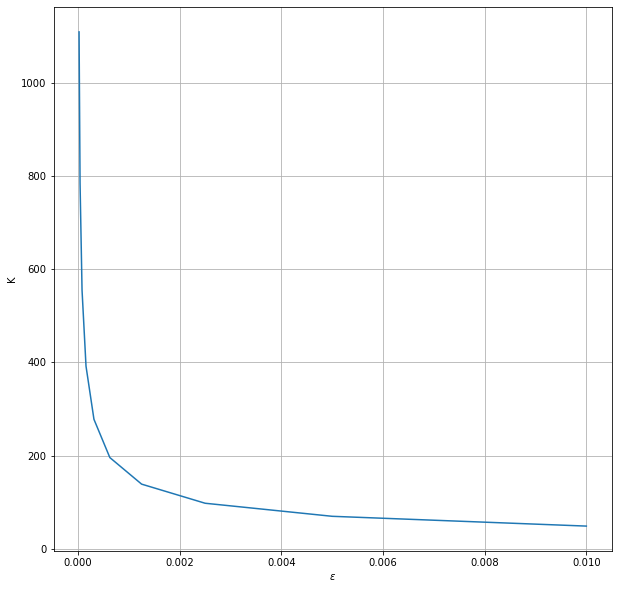

In [40]:
f = lambda x: x**3
a = 0
b = 4
int, N = midpoint_rule(f, a, b, eps=10**(-2))
print("Значение интеграла с точностью $10^{-2}$ равно", int, "при количестве интервалов N =", N)

eps = [0.01 / 2**(i) for i in range(10)]
K = [midpoint_rule(f, a, b, eps=0.01 / 2**(i))[1] for i in range(10)]
plt.figure(figsize=(10, 10))
plt.plot(eps, K)
plt.xlabel("$\epsilon$")
plt.ylabel("K")
plt.grid(True)

В проверке участвовала функция $f(x)=x^2$. Самостоятельное решение интеграла дает ответ 64, а вычисленное решение дает ответ 63.98667221990835.

$\epsilon=0.01$ значит интервал значения интеграла с учетом заданной ошибки равен $[63.99, 64.01]$. И вычисленное значение не попадает в этот интервал.

Скорость сходимость равна предполагаемой $O(N^{-2})$.

## Тест II.2

Используя ваш алгоритм, посчитайте значение

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

с точностью до $\epsilon=10^{-4}$.

Заметим, что интеграл содержит интегрируемую особенность в нижнем пределе. Выполните вычисление двумя способами: во первых, посчитайте интеграл "в лоб", во вторых, вычтите особенность из подынтегрального выражения. Сравните количество необходимых итераций для достижения заданной точности $\epsilon$.

(30% итоговой оценки)

Для начала произведем замену $\sqrt{x}=y$. Далее см. $f_1$.

Во втором случае $\frac{\sin{\sqrt{x}}}{x} = (\frac{\sin{\sqrt{x}}}{x} - \frac{1}{\sqrt{x}}) + \frac{1}{\sqrt{x}}$. При замене $\sqrt{x}=y$ последнее слагаемое под интегралом станет $2*dy$. После вычисления это 2. Далее см. $f_2$.

In [41]:
f1 = lambda y: 2 * np.sin(y) / y
a = 0
b = 1
int1, N1 = midpoint_rule(f1, a, b, eps=10**(-4))
print("Значение интеграла с точностью $10^{-4}$ равно", int1, "при количестве интервалов N =", N1)

f2 = lambda x: np.sin(np.sqrt(x)) / x - 1 / np.sqrt(x) + 2
int2, N2 = midpoint_rule(f2, a, b, eps=10**(-4))
print("Значение интеграла с точностью $10^{-4}$ равно", int2, "при количестве интервалов N =", N2)

Значение интеграла с точностью $10^{-4}$ равно 1.8922941998480554 при количестве интервалов N = 14
Значение интеграла с точностью $10^{-4}$ равно 1.8920193180026725 при количестве интервалов N = 16


# Часть  III 


Вычислите определённый интеграл **методом трапеций**  с вычитанием сингулярности

$$
I = \int_{0}^{1}\frac{e^x}{\sqrt{x(1-x)}}dx.
$$

Преобразуйте данный интеграл, вычитая сингулярности. Выпишите расчетные формулы.

Вам могут пригодиться значения следующих определенных интегралов:

$$
\int_0^1 \frac{1}{\sqrt{x (1-x)}} \, dx=\pi,\quad \int_0^1 \frac{x}{\sqrt{x (1-x)}} \, dx=\pi/2.
$$

Особыми точками являются $x_1 = 0$ и $x_2 = 1$.

Cоставьте функцию, возвращающую значение интеграла методом трапеций.

In [42]:
def integ(npts=10):
    """Compute the value of the integral above.
    
    Subtract the singularities and use the trapezoid rule. 
    
    Parameters
    ----------
    npts : int
        The number of points for the trapezoid rule
        
    Returns
    -------
    I : float
       The computed value of the integral
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [43]:
# this is a test to check your computed value
from numpy.testing import assert_allclose
